In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [59]:
# Lecture des données
df = pd.read_csv("/kaggle/input/iris-flower-dataset/IRIS.csv")

In [60]:
# Exploration des données
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [62]:
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [63]:
df['species'].value_counts()


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

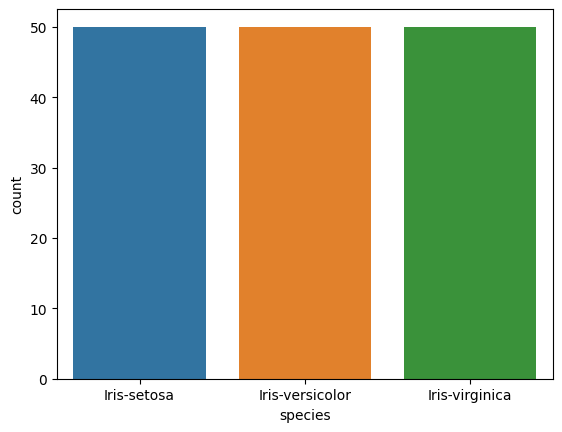

In [24]:
# Visualisation des données
sns.countplot(data=df, x='species')
plt.show()

In [28]:
X = df.drop(['species'],axis= 'columns')
y = df['species']

In [41]:
# Définition des paramètres des différents modèles
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'parameters': {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear']
        }
    },
    'Random_forest': {
        'model': RandomForestClassifier(),
        'parameters': {
            'n_estimators': [1, 5, 10, 20, 40]
        }
    },
    'Naive_bayes': {
        'model': GaussianNB(),
        'parameters': {
            'var_smoothing': [1.2, 5.5, 6.7]
        }
    },
    'MultinomialNB': {
        'model': MultinomialNB(),
        'parameters': {
            'alpha': [1.0, 2.0, 3.0, 10.0, 20.0]
        }
    },
    'Decision_tree': {
        'model': DecisionTreeClassifier(),
        'parameters': {
            'criterion': ['gini', 'entropy']
        }
    },
    'K_nearest_neighbor': {
        'model': KNeighborsClassifier(),
        'parameters': {
            'n_neighbors': [5, 10, 15]
        }
    },
}


In [57]:
scores = []
# Recherche des meilleurs paramètres pour chaque modèle
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['parameters'], cv=5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_parameters': clf.best_params_,
        
    })

# Création d'un DataFrame avec les résultats
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_parameters' ])
df

,model,best_score,best_parameters
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,Random_forest,0.966667,{'n_estimators': 10}
2,Naive_bayes,0.913333,{'var_smoothing': 1.2}
3,MultinomialNB,0.966667,{'alpha': 10.0}
4,Decision_tree,0.966667,{'criterion': 'gini'}
5,K_nearest_neighbor,0.980000,{'n_neighbors': 10}


Les résultats de l'évaluation des différents modèles montrent que les SVM et les k plus proches voisins ont obtenu les scores les plus élevés, suivis par le Random Forest, le Multinomial Naive Bayes et l'arbre de décision. Naive Bayes, bien qu'ayant un score légèrement inférieur, reste une option viable pour sa simplicité.